In [23]:
# SIMULATIONS OF COMPLEX SYSTEMS
# 2020 Project: Simulation of stadium evacuation
# Collaborators: Alfred Bergsten, Giannis Kostaras, Mohammad Zoubi, Andreas Spetz

import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import stadium
import templates


probability = 0.0002

def print_info(name):
    print(f'Project: {name}')  # Press Ctrl+F8 to toggle the breakpoint.

class agent:
  def __init__(self, tag, x, y):
    self.tag = tag
    self.x = x
    self.y = y
    #self.moved = 0
    
def initiate_agents_test(grid):
    return [agent(0, 266, 178), agent(1, 266, 180), agent(2, 63, 80)]

def initiate_agents_random(grid, p):
    n = 0
    agent_list = []
    x_dim = grid.shape[0]
    y_dim = grid.shape[1]    
    for x in range(x_dim):
        for y in range(y_dim):
            if grid[x][y] == 3:
                if random.random() <= p:
                    a = agent(n, x, y)
                    agent_list.append(a)
                    n += 1
    return agent_list
                
    
    
def visualize(grid, agents):
    grid_to_plot = 0
    grid_to_plot = grid
    for a in agents:
        #print(a.x,a.y)
        grid_to_plot[a.x][a.y] = 8
    plt.figure(figsize = (12,12))
    plt.imshow(grid_to_plot, interpolation='nearest', cmap='cividis')
    plt.show()
    
def move_agent(grid, agents, ag):  # moves one agent by one time step
    x_dim = grid.shape[0]
    y_dim = grid.shape[1]
    gate_x = []
    gate_y = []
    gate = []
    grid_saved = grid
    for x in range(x_dim):  # find the gates
        for y in range(y_dim):
            if grid[x][y] == 2:
                gate_x.append(x)
                gate_y.append(y)
                gate.append([x,y])
    gate_distances = []  # find the nearest gate to the agent
    for g in gate:
        gate_distances.append(abs(ag.x-g[0])+abs(ag.y-g[1]))
    nearest_gate = gate[gate_distances.index(min(gate_distances))]  # this is the nearest gate to the agent
    for a in agents:  # designate the occupied positions by other agents to avoid collisions
        grid_saved[a.x][a.y] = 8
    if (ag.x < nearest_gate[0]) and (grid_saved[ag.x+1][ag.y]==3):
        ag.x += 1
        grid_saved[ag.x][ag.y] = 8
        grid_saved[ag.x-1][ag.y] = 3
    if (ag.x > nearest_gate[0]) and (grid_saved[ag.x-1][ag.y]==3):
        ag.x -= 1
        grid_saved[ag.x][ag.y] = 8
        grid_saved[ag.x+1][ag.y] = 3
    if (ag.y < nearest_gate[1]) and (grid_saved[ag.x][ag.y+1]==3):
        agent.y += 1
        grid_saved[ag.x][ag.y] = 8
        grid_saved[ag.x][ag.y-1] = 3
    if (ag.y > nearest_gate[1]) and (grid_saved[ag.x][ag.y-1]==3):
        ag.y -= 1
        grid_saved[ag.x][ag.y] = 8
        grid_saved[ag.x][ag.y+1] = 3
    if (abs(ag.x - nearest_gate[0]) <= 1) and (abs(ag.y - nearest_gate[1]) <= 1):
        agents.pop(agents.index(ag))
        grid_saved[ag.x][ag.y] = 3
        
    


                    
# Press the green button in the gutter to run the script.
if __name__ == '__main__':
    print_info('Stadium evacuation simulation.')
    stadium_outline = templates.big_stadium()
    stadium_big = stadium.create_stadium(stadium_outline)
    stadium_big[0][0] = 8  # color reference point in visualization
    agents = []
    #agents = initiate_agents_test(stadium_big)
    agents = initiate_agents_random(stadium_big, probability)

Project: Stadium evacuation simulation.


Number of agents in stadium:  8  at time =  0
Number of agents in stadium:  8  at time =  1
Number of agents in stadium:  8  at time =  2
Number of agents in stadium:  8  at time =  3
Number of agents in stadium:  8  at time =  4
Number of agents in stadium:  8  at time =  5
Number of agents in stadium:  8  at time =  6
Number of agents in stadium:  8  at time =  7
Number of agents in stadium:  8  at time =  8
Number of agents in stadium:  8  at time =  9
Number of agents in stadium:  7  at time =  10
Number of agents in stadium:  7  at time =  11
Number of agents in stadium:  6  at time =  12
Number of agents in stadium:  6  at time =  13
Number of agents in stadium:  5  at time =  14
Number of agents in stadium:  5  at time =  15
Number of agents in stadium:  5  at time =  16
Number of agents in stadium:  5  at time =  17
Number of agents in stadium:  5  at time =  18
Number of agents in stadium:  5  at time =  19
Number of agents in stadium:  5  at time =  20
Number of agents in sta

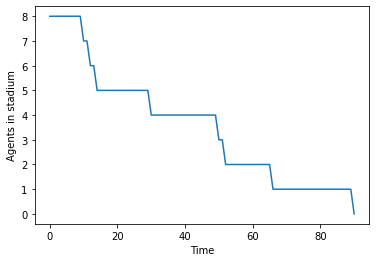

In [24]:
t = 0
t_list = []
a_list = []
starting_agents = len(agents)
while len(agents) > 0:
    a_list.append(len(agents))
    t_list.append(t)
    print('Number of agents in stadium: ', len(agents), ' at time = ', t)
    for agent in agents:
        move_agent(stadium_big, agents, agent)
    t += 1
print('Number of agents in stadium: ', len(agents), ' at time = ', t)
a_list.append(len(agents))
t_list.append(t)    
#visualize(stadium_big, agents)
plt.plot(t_list, a_list)
plt.xlabel('Time')
plt.ylabel('Agents in stadium')
plt.savefig('agents_{}_in_stadium_plot.png'.format(starting_agents))